In [1]:
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
np.isnan(x_train).any()

False

In [5]:
x_train.dtype

dtype('uint8')

In [6]:
y_train.dtype

dtype('uint8')

In [7]:
category_labels = 10

y_train = keras.utils.to_categorical(y_train, category_labels)
y_test = keras.utils.to_categorical(y_test, category_labels)

In [8]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

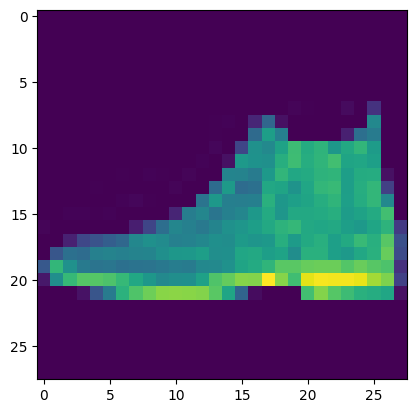

In [9]:
plt.imshow(x_test[0])
y_test[0]

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))

for layer in range(10):
    model.add(keras.layers.Dense(100, activation="relu"))
    
model.add(keras.layers.AlphaDropout(rate=0.2))

model.add(keras.layers.Dense(category_labels, activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

In [12]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=["accuracy"])

In [13]:
epochs = 50
batch_size = 32   

early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=4)

history = model.fit(x_train, y_train, epochs=epochs,
                    validation_data=(x_test, y_test),
                    batch_size=batch_size, shuffle=True, 
                    callbacks=[lr_scheduler, early_stopping])

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1331 - accuracy: 0.7407 - val_loss: 0.0928 - val_accuracy: 0.8277 - lr: 0.0100
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.8296 - val_loss: 0.0908 - val_accuracy: 0.8294 - lr: 0.0100
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0781 - accuracy: 0.8482 - val_loss: 0.0798 - val_accuracy: 0.8395 - lr: 0.0100
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0719 - accuracy: 0.8608 - val_loss: 0.0883 - val_accuracy: 0.8450 - lr: 0.0100
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0685 - accuracy: 0.8662 - val_loss: 0.0840 - val_accuracy: 0.8424 - lr: 0.0100
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0656 - accuracy: 0.8710 - val_loss: 0.0810 - val_accuracy: 0.8577 - lr: 0.0100
Epoch 7/50
1875/1875 [==============================] - 4s

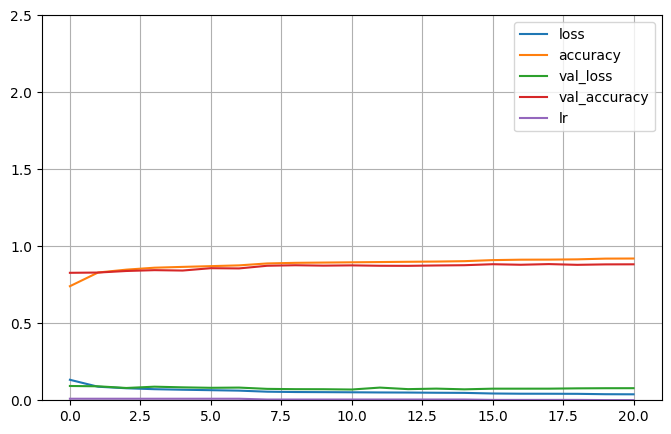

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2.5)
plt.show()

In [15]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

y_pred = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0699 - accuracy: 0.8760
Test loss: 0.06987353414297104
Test accuracy: 0.8759999871253967
313/313 [==============================] - 0s 1ms/step


In [16]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_test, axis=1) 
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

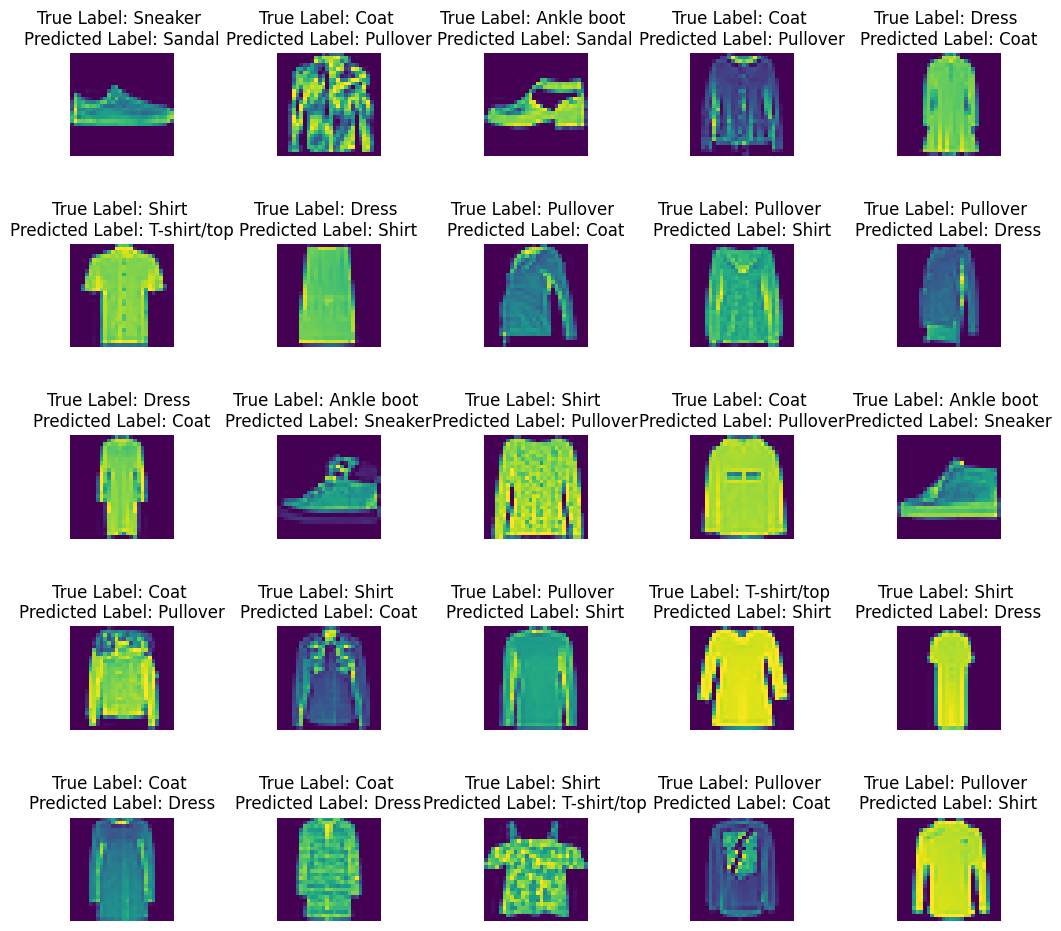

In [17]:
rows = 5
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(12,12))
axes = axes.ravel()

false_predictions = np.where(y_pred_classes != y_true)[0]
for i in np.arange(0, rows*cols):
    axes[i].imshow(x_test[false_predictions[i]])
    axes[i].set_title("True Label: %s \nPredicted Label: %s" % (labels[y_true[false_predictions[i]]], 
                                                  labels[y_pred_classes[false_predictions[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

[[Text(0.5, 0, 'T-shirt/top'),
  Text(1.5, 0, 'Trouser'),
  Text(2.5, 0, 'Pullover'),
  Text(3.5, 0, 'Dress'),
  Text(4.5, 0, 'Coat'),
  Text(5.5, 0, 'Sandal'),
  Text(6.5, 0, 'Shirt'),
  Text(7.5, 0, 'Sneaker'),
  Text(8.5, 0, 'Bag'),
  Text(9.5, 0, 'Ankle boot')],
 [Text(0, 0.5, 'T-shirt/top'),
  Text(0, 1.5, 'Trouser'),
  Text(0, 2.5, 'Pullover'),
  Text(0, 3.5, 'Dress'),
  Text(0, 4.5, 'Coat'),
  Text(0, 5.5, 'Sandal'),
  Text(0, 6.5, 'Shirt'),
  Text(0, 7.5, 'Sneaker'),
  Text(0, 8.5, 'Bag'),
  Text(0, 9.5, 'Ankle boot')]]

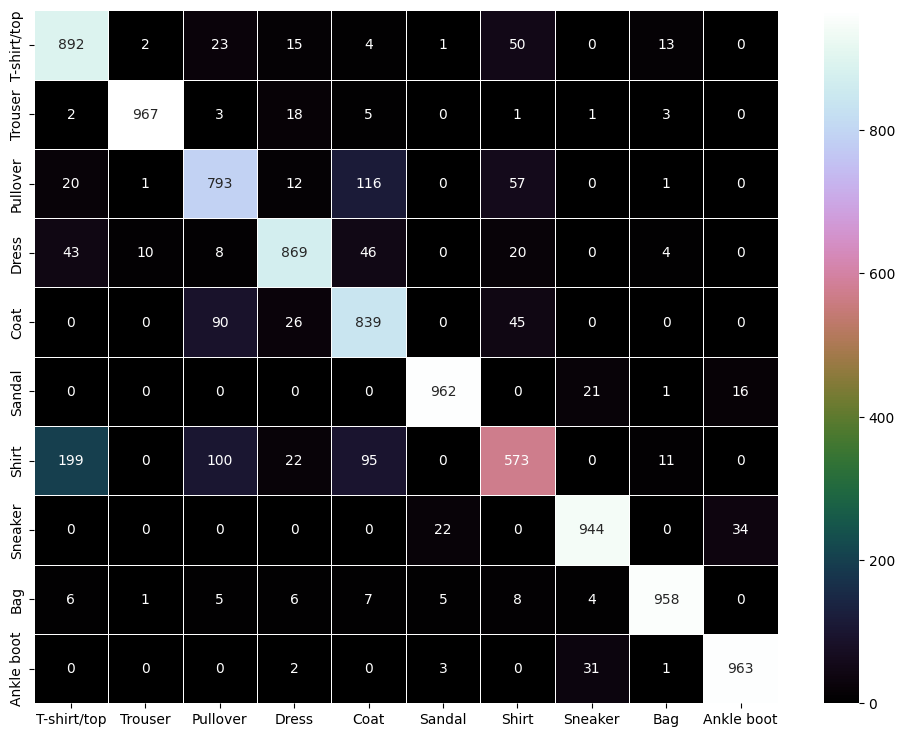

In [18]:
cm = tf.math.confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 9))
heatmap = sns.heatmap(cm, annot=True, cmap='cubehelix', linewidth=.5, fmt='g')
heatmap.set(xticklabels=labels, yticklabels=labels)